In [ ]:
import pandas as pd

df = pd.read_csv('grid_asset_data.csv')
display(df.head())

,Timestamp,Substation_ID,Asset_ID,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Fault_Event,Reconfig_Action,Asset_Type
0,2025-05-01 00:00:00,SS_001,TR_01,232.48,9.59,2.23,50.13,0.0372,Industrial,NaN,NaN,Transformer
1,2025-05-01 00:01:00,SS_001,SW_01,237.62,9.30,2.21,49.95,0.0368,Industrial,NaN,NaN,Switch
2,2025-05-01 00:02:00,SS_001,SM_01,237.90,12.30,2.93,49.91,0.0488,Residential,NaN,NaN,SmartMeter
3,2025-05-01 00:03:00,SS_001,SW_01,232.71,8.61,2.00,49.91,0.0333,Commercial,NaN,NaN,Switch
4,2025-05-01 00:04:00,SS_002,SM_01,231.21,4.26,0.98,49.66,0.0163,Commercial,NaN,NaN,SmartMeter


In [ ]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1440 non-null   object 
 1   Substation_ID        1440 non-null   object 
 2   Asset_ID             1440 non-null   object 
 3   Voltage_V            1440 non-null   float64
 4   Current_A            1440 non-null   float64
 5   Power_kW             1440 non-null   float64
 6   Frequency_Hz         1440 non-null   float64
 7   Energy_Consumed_kWh  1440 non-null   float64
 8   Load_Type            1440 non-null   object 
 9   Fault_Event          204 non-null    object 
 10  Reconfig_Action      204 non-null    object 
 11  Asset_Type           1440 non-null   object 
dtypes: float64(5), object(7)
memory usage: 135.1+ KB


,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,230.035472,9.932660,2.284333,50.008819,0.038071
std,4.923169,3.037991,0.699118,0.199096,0.011652
min,215.300000,0.280000,0.060000,49.400000,0.001000
25%,226.770000,7.877500,1.800000,49.870000,0.030000
50%,230.040000,9.885000,2.280000,50.010000,0.038000
75%,233.195000,11.942500,2.740000,50.140000,0.045700
max,249.630000,19.580000,4.640000,50.770000,0.077300


**Reasoning**:
Calculate and display the number and percentage of missing values for the `Fault_Event` and `Reconfig_Action` columns.



In [ ]:
fault_event_missing_count = df['Fault_Event'].isnull().sum()
fault_event_missing_percentage = (fault_event_missing_count / len(df)) * 100

reconfig_action_missing_count = df['Reconfig_Action'].isnull().sum()
reconfig_action_missing_percentage = (reconfig_action_missing_count / len(df)) * 100

print(f"Missing values in 'Fault_Event': {fault_event_missing_count} ({fault_event_missing_percentage:.2f}%)")
print(f"Missing values in 'Reconfig_Action': {reconfig_action_missing_count} ({reconfig_action_missing_percentage:.2f}%)")

Missing values in 'Fault_Event': 1236 (85.83%)
Missing values in 'Reconfig_Action': 1236 (85.83%)


**Reasoning**:
Fill the missing values in the specified columns with the given strings.



In [ ]:
df['Fault_Event'] = df['Fault_Event'].fillna('No Fault')
df['Reconfig_Action'] = df['Reconfig_Action'].fillna('No Reconfig')

display(df.head())

,Timestamp,Substation_ID,Asset_ID,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Fault_Event,Reconfig_Action,Asset_Type
0,2025-05-01 00:00:00,SS_001,TR_01,232.48,9.59,2.23,50.13,0.0372,Industrial,No Fault,No Reconfig,Transformer
1,2025-05-01 00:01:00,SS_001,SW_01,237.62,9.30,2.21,49.95,0.0368,Industrial,No Fault,No Reconfig,Switch
2,2025-05-01 00:02:00,SS_001,SM_01,237.90,12.30,2.93,49.91,0.0488,Residential,No Fault,No Reconfig,SmartMeter
3,2025-05-01 00:03:00,SS_001,SW_01,232.71,8.61,2.00,49.91,0.0333,Commercial,No Fault,No Reconfig,Switch
4,2025-05-01 00:04:00,SS_002,SM_01,231.21,4.26,0.98,49.66,0.0163,Commercial,No Fault,No Reconfig,SmartMeter


**Reasoning**:
Verify that the missing values have been filled correctly in the specified columns.



In [ ]:
print(df['Fault_Event'].isnull().sum())
print(df['Reconfig_Action'].isnull().sum())

0
0


In [ ]:
df = df.drop(columns=['Timestamp', 'Substation_ID', 'Asset_ID', 'Asset_Type'])
display(df.head())

,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Fault_Event,Reconfig_Action
0,232.48,9.59,2.23,50.13,0.0372,Industrial,No Fault,No Reconfig
1,237.62,9.30,2.21,49.95,0.0368,Industrial,No Fault,No Reconfig
2,237.90,12.30,2.93,49.91,0.0488,Residential,No Fault,No Reconfig
3,232.71,8.61,2.00,49.91,0.0333,Commercial,No Fault,No Reconfig
4,231.21,4.26,0.98,49.66,0.0163,Commercial,No Fault,No Reconfig


In [ ]:
contingency_table = pd.crosstab(df['Fault_Event'], df['Reconfig_Action'])
print(contingency_table)

Reconfig_Action  Load_Balance  No Reconfig
Fault_Event                               
No Fault                    0         1236
Outage                     75            0
Overload                   63            0
UnderVoltage               66            0


In [ ]:
df = df.drop(columns=['Reconfig_Action'])
display(df.head())

,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Fault_Event
0,232.48,9.59,2.23,50.13,0.0372,Industrial,No Fault
1,237.62,9.30,2.21,49.95,0.0368,Industrial,No Fault
2,237.90,12.30,2.93,49.91,0.0488,Residential,No Fault
3,232.71,8.61,2.00,49.91,0.0333,Commercial,No Fault
4,231.21,4.26,0.98,49.66,0.0163,Commercial,No Fault


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)

,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Fault_Event
0,232.48,9.59,2.23,50.13,0.0372,Industrial,No Fault
1,237.62,9.30,2.21,49.95,0.0368,Industrial,No Fault
2,237.90,12.30,2.93,49.91,0.0488,Residential,No Fault
3,232.71,8.61,2.00,49.91,0.0333,Commercial,No Fault
4,231.21,4.26,0.98,49.66,0.0163,Commercial,No Fault
5,227.19,6.96,1.58,50.06,0.0263,Industrial,No Fault
6,225.46,5.76,1.30,50.29,0.0217,Industrial,No Fault
7,228.87,10.20,2.33,49.72,0.0388,Residential,No Fault
8,227.28,10.33,2.35,49.77,0.0392,Residential,Outage
9,231.88,8.20,1.90,49.94,0.0317,Commercial,No Fault


from matplotlib import pyplot as plt
df['Voltage_V'].plot(kind='hist', bins=20, title='Voltage_V')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Current_A'].plot(kind='hist', bins=20, title='Current_A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Power_kW'].plot(kind='hist', bins=20, title='Power_kW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Frequency_Hz'].plot(kind='hist', bins=20, title='Frequency_Hz')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Load_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fault_Event').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Voltage_V', y='Current_A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Current_A', y='Power_kW', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Power_kW', y='Frequency_Hz', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Frequency_Hz', y='Energy_Consumed_kWh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Voltage_V'].plot(kind='line', figsize=(8, 4), title='Voltage_V')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Current_A'].plot(kind='line', figsize=(8, 4), title='Current_A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Power_kW'].plot(kind='line', figsize=(8, 4), title='Power_kW')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Frequency_Hz'].plot(kind='line', figsize=(8, 4), title='Frequency_Hz')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Fault_Event'].value_counts()
    for x_label, grp in df.groupby('Load_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Load_Type')
_ = plt.ylabel('Fault_Event')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Load_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Voltage_V', y='Load_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fault_Event'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Voltage_V', y='Fault_Event', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Load_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Current_A', y='Load_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fault_Event'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Current_A', y='Fault_Event', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

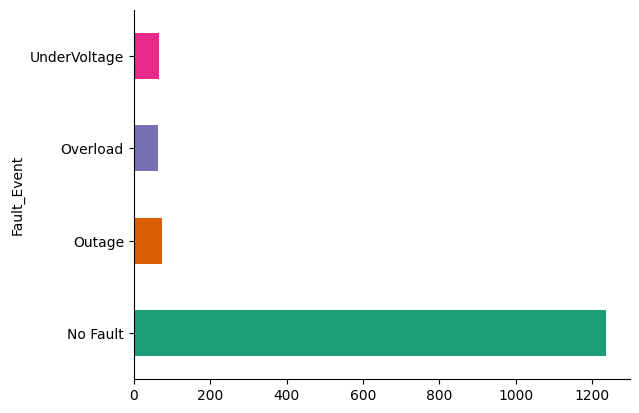

In [ ]:
# @title Fault_Event

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fault_Event').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Task
Train an XGBoost model on the "grid_asset_data.csv" dataset to predict the 'Fault_Event' column. Split the data into 80% training and 20% testing sets. Drop the columns 'Timestamp', 'Substation_ID', 'Asset_ID', 'Asset_Type', and 'Reconfig_Action'. Handle the remaining categorical feature 'Load_Type' using one-hot encoding. Evaluate the model's performance.

## Prepare data for modeling

### Subtask:
Separate the features (X) and the target variable (y).


**Reasoning**:
Separate the features (X) and the target variable (y) based on the instructions.



In [ ]:
X = df.drop(columns=['Fault_Event'])
y = df['Fault_Event']
display(X.head())
display(y.head())

,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type
0,232.48,9.59,2.23,50.13,0.0372,Industrial
1,237.62,9.30,2.21,49.95,0.0368,Industrial
2,237.90,12.30,2.93,49.91,0.0488,Residential
3,232.71,8.61,2.00,49.91,0.0333,Commercial
4,231.21,4.26,0.98,49.66,0.0163,Commercial


,Fault_Event
0,No Fault
1,No Fault
2,No Fault
3,No Fault
4,No Fault


## Split data

### Subtask:
Split the data into training and testing sets (80% train, 20% test).


**Reasoning**:
Split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1152, 6)
X_test shape: (288, 6)
y_train shape: (1152,)
y_test shape: (288,)


## Train xgboost model

### Subtask:
Train an XGBoost classifier on the training data.


**Reasoning**:
Import the XGBoost classifier and train the model on the processed training data.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Load_Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)

Shape of X_train_processed: (1152, 8)
Shape of X_test_processed: (288, 8)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='merror')
xgb_model.fit(X_train_processed, y_train_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:54:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluate model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate classification metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Evaluate the trained model's performance on the testing data using appropriate classification metrics.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = xgb_model.predict(X_test_processed)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

Accuracy: 0.8611
Precision (weighted): 0.7471
Recall (weighted): 0.8611
F1-score (weighted): 0.8001


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Summary:

### Data Analysis Key Findings

*   The data was successfully split into 80% training and 20% testing sets.
*   The categorical feature 'Load\_Type' was successfully one-hot encoded, increasing the number of features.
*   The target variable 'Fault\_Event' was label encoded into a numerical format before training the XGBoost model.
*   The trained XGBoost model achieved an accuracy of approximately 86.11\% on the test data.
*   The weighted precision, recall, and F1-score on the test set were approximately 74.71\%, 86.11\%, and 80.01\%, respectively.
*   A warning during evaluation indicated that some classes in the test set had no predicted samples, suggesting potential issues with predicting minority classes.

### Insights or Next Steps

*   Investigate the class distribution of the 'Fault\_Event' column to understand the potential for class imbalance, which might explain the `UndefinedMetricWarning` and lower precision/F1-score compared to accuracy.
*   Consider techniques to address class imbalance, such as oversampling minority classes (e.g., SMOTE) or using evaluation metrics appropriate for imbalanced datasets (e.g., confusion matrix, per-class metrics).


# Task
Evaluate the trained XGBoost model and train and evaluate Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM) models on the "grid_asset_data.csv" dataset, comparing their performance to predict the 'Fault_Event' column.

## Evaluate xgboost model

### Subtask:
Evaluate the trained XGBoost model's performance on the testing data using appropriate classification metrics.


## Train and evaluate logistic regression

### Subtask:
Train a Logistic Regression model on the preprocessed data and evaluate its performance.


**Reasoning**:
Import LogisticRegression, train the model, make predictions, and evaluate its performance using accuracy, precision, recall, and F1-score.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_processed, y_train_encoded)

y_pred_lr = lr_model.predict(X_test_processed)

accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
precision_lr = precision_score(y_test_encoded, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test_encoded, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test_encoded, y_pred_lr, average='weighted')

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision (weighted): {precision_lr:.4f}")
print(f"Logistic Regression Recall (weighted): {recall_lr:.4f}")
print(f"Logistic Regression F1-score (weighted): {f1_lr:.4f}")

Logistic Regression Accuracy: 0.8646
Logistic Regression Precision (weighted): 0.7475
Logistic Regression Recall (weighted): 0.8646
Logistic Regression F1-score (weighted): 0.8018


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train and evaluate decision tree

### Subtask:
Train a Decision Tree model on the preprocessed data and evaluate its performance.


**Reasoning**:
Train a Decision Tree model on the preprocessed data and evaluate its performance.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train_encoded)

y_pred_dt = dt_model.predict(X_test_processed)

accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
precision_dt = precision_score(y_test_encoded, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_encoded, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_encoded, y_pred_dt, average='weighted')

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision (weighted): {precision_dt:.4f}")
print(f"Decision Tree Recall (weighted): {recall_dt:.4f}")
print(f"Decision Tree F1-score (weighted): {f1_dt:.4f}")

Decision Tree Accuracy: 0.7118
Decision Tree Precision (weighted): 0.7490
Decision Tree Recall (weighted): 0.7118
Decision Tree F1-score (weighted): 0.7296


## Train and evaluate random forest

### Subtask:
Train a Random Forest model on the preprocessed data and evaluate its performance.


**Reasoning**:
Train a Random Forest model and evaluate its performance.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train_encoded)

y_pred_rf = rf_model.predict(X_test_processed)

accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision (weighted): {precision_rf:.4f}")
print(f"Random Forest Recall (weighted): {recall_rf:.4f}")
print(f"Random Forest F1-score (weighted): {f1_rf:.4f}")

Random Forest Accuracy: 0.8611
Random Forest Precision (weighted): 0.7632
Random Forest Recall (weighted): 0.8611
Random Forest F1-score (weighted): 0.8054


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train and evaluate support vector machine (svm)

### Subtask:
Train an SVM model on the preprocessed data and evaluate its performance.


**Reasoning**:
Import the necessary libraries and train the SVM model.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_processed, y_train_encoded)

y_pred_svm = svm_model.predict(X_test_processed)

accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
precision_svm = precision_score(y_test_encoded, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_encoded, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision (weighted): {precision_svm:.4f}")
print(f"SVM Recall (weighted): {recall_svm:.4f}")
print(f"SVM F1-score (weighted): {f1_svm:.4f}")

SVM Accuracy: 0.8646
SVM Precision (weighted): 0.7475
SVM Recall (weighted): 0.8646
SVM F1-score (weighted): 0.8018


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Compare model performance

### Subtask:
Compare the performance of all trained models based on the evaluation metrics.


**Reasoning**:
I will create a dictionary to store the performance metrics of all the trained models, convert it to a pandas DataFrame, and then display the DataFrame to compare their performance as per the instructions.



In [ ]:
performance_data = {
    'Model': ['XGBoost', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy, accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm],
    'Precision': [precision, precision_lr, precision_dt, precision_rf, precision_svm],
    'Recall': [recall, recall_lr, recall_dt, recall_rf, recall_svm],
    'F1-score': [f1, f1_lr, f1_dt, f1_rf, f1_svm]
}

performance_df = pd.DataFrame(performance_data)
display(performance_df)

,Model,Accuracy,Precision,Recall,F1-score
0,XGBoost,0.861111,0.747096,0.861111,0.800062
1,Logistic Regression,0.864583,0.747504,0.864583,0.801792
2,Decision Tree,0.711806,0.748972,0.711806,0.729607
3,Random Forest,0.861111,0.763194,0.861111,0.805376
4,SVM,0.864583,0.747504,0.864583,0.801792


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='merror')
xgb_model.fit(X_train_processed, y_train_encoded)

In [ ]:
import joblib

# Define the filename for the saved model
filename = 'svm_model.joblib'

# Save the model to the file
joblib.dump(svm_model, filename)

print(f"SVM model saved to {filename}")

SVM model saved to svm_model.joblib


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the data
df = pd.read_csv('grid_asset_data.csv')

# Fill missing values
df['Fault_Event'] = df['Fault_Event'].fillna('No Fault')
df['Reconfig_Action'] = df['Reconfig_Action'].fillna('No Reconfig')

# Drop irrelevant columns
df = df.drop(columns=['Timestamp', 'Substation_ID', 'Asset_ID', 'Asset_Type', 'Reconfig_Action'])

# Separate features (X) and target (y)
X = df.drop(columns=['Fault_Event'])
y = df['Fault_Event']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical features
categorical_features = ['Load_Type']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train_encoded)

# Make predictions and evaluate the model
y_pred_rf = rf_model.predict(X_test_processed)

accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision (weighted): {precision_rf:.4f}")
print(f"Random Forest Recall (weighted): {recall_rf:.4f}")
print(f"Random Forest F1-score (weighted): {f1_rf:.4f}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the data
df = pd.read_csv('grid_asset_data.csv')

# Fill missing values
df['Fault_Event'] = df['Fault_Event'].fillna('No Fault')
df['Reconfig_Action'] = df['Reconfig_Action'].fillna('No Reconfig')

# Drop irrelevant columns
df = df.drop(columns=['Timestamp', 'Substation_ID', 'Asset_ID', 'Asset_Type', 'Reconfig_Action'])

# Separate features (X) and target (y)
X = df[['Voltage_V', 'Current_A', 'Power_kW', 'Frequency_Hz', 'Energy_Consumed_kWh', 'Load_Type']]
y = df['Fault_Event']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical features
categorical_features = ['Load_Type']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train_encoded)

# Make predictions and evaluate the model
y_pred_rf = rf_model.predict(X_test_processed)

accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision (weighted): {precision_rf:.4f}")
print(f"Random Forest Recall (weighted): {recall_rf:.4f}")
print(f"Random Forest F1-score (weighted): {f1_rf:.4f}")